# Домашнє завдання №10

# Частина №1

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

## Завантаження датасету

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print("Розмір тренувального датасету:", len(train_data))
print("Перший елемент тренувального датасету:", train_data[0])
print("Мітки тренувального датасету:", train_labels)
print("Значення міток: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Перший елемент тренувального датасету: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


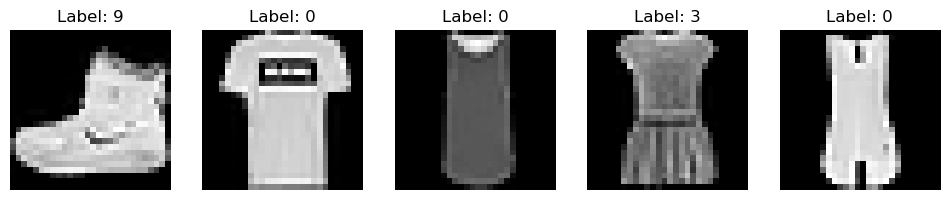

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()


## Приклад елементу даних

In [6]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

print(train_data[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

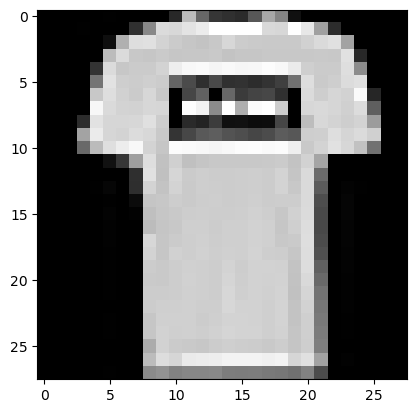

In [7]:
plt.imshow(train_data[1], cmap='gray')

## Створення моделі

In [8]:
from keras import layers
from keras import models
from keras.layers import PReLU

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="PReLU", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="PReLU"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="PReLU"),

    layers.Flatten(),
    layers.Dense(64, activation="PReLU"),
    layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        21952     
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        26240     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          37504     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Компіляція і тренування моделі

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=6, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/6
235/235 [==============================] - 34s 139ms/step - loss: 0.0646 - accuracy: 0.9753 - val_loss: 0.4644 - val_accuracy: 0.9086
Epoch 2/6
235/235 [==============================] - 32s 137ms/step - loss: 0.0532 - accuracy: 0.9795 - val_loss: 0.5101 - val_accuracy: 0.9041
Epoch 3/6
235/235 [==============================] - 32s 138ms/step - loss: 0.0518 - accuracy: 0.9808 - val_loss: 0.5004 - val_accuracy: 0.9052
Epoch 4/6
235/235 [==============================] - 33s 141ms/step - loss: 0.0436 - accuracy: 0.9837 - val_loss: 0.5223 - val_accuracy: 0.9091
Epoch 5/6
235/235 [==============================] - 32s 136ms/step - loss: 0.0490 - accuracy: 0.9819 - val_loss: 0.5176 - val_accuracy: 0.9068
Epoch 6/6
235/235 [==============================] - 32s 137ms/step - loss: 0.0514 - accuracy: 0.9814 - val_loss: 0.5455 - val_accuracy: 0.9082


In [20]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 9ms/step - loss: 0.5455 - accuracy: 0.9082
Test Accuracy: 0.9082000255584717


In [21]:
def history_visual(history):    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

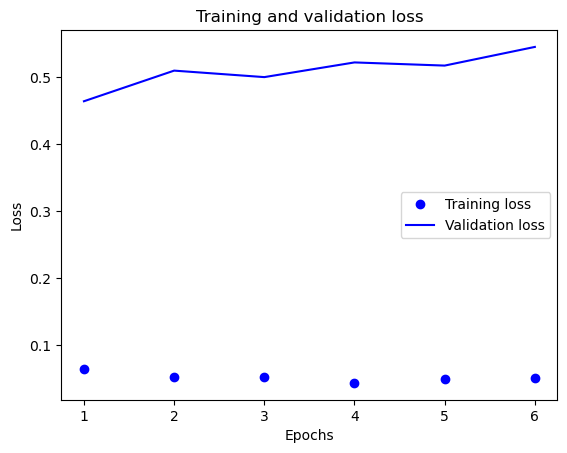

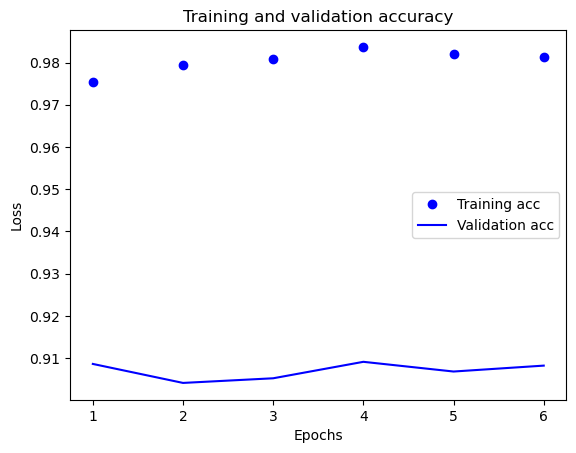

In [27]:
history_visual(history)

## Висновок №1
Побудована модель показала гарні результати на навчальній вибірці: точність нейромережі становить приблизно 98%. На валідаційних даних результати дещо гірші: максимальна точність склала приблизно 91%. У порівнянні з найкращою моделлю, побудованою у домашньому завданні №9, згорткова нейромережа показала кращі результати.

### Порівняльна таблиця двох нейромереж
|     Параметр    | Нейромережа ДЗ №9 | Нейромережа ДЗ №10 |
|-----------------|-------|--------|
|Кількість шарів  |   3   |    8   |
|Функція активації| PReLU |  PReLU |
|Кількість епох   |   50  |    6   |
|Розмір батчу     |  250  |   256  |
|Оптимізатор      | Adam  |  Adam  |
|Точність         |  91%  |   98%  |  
|Точність на валідаційних даних   |  90%  |   91%  |


# Частина №2:

## Завантаження передвиборної моделі VGG16 без повністю з'єднаних шарів

In [81]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg16_base.trainable = False

vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## Побудова моделі з виділенням ознак

In [83]:
from keras import layers
from keras import models
from keras.layers import PReLU

model1 = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(64, activation="PReLU"),
    layers.Dense(10, activation="softmax")
])
                                                  
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                131200    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 14846538 (56.64 MB)
Trainable params: 131850 (515.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Компіляція мережі

In [85]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Підготовка даних

In [77]:
import numpy as np
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import models
from keras.layers import PReLU
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def resize_image(image, target_size=(64, 64)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

def preprocess_image(image):
    image = image / 255.0  
    return image


(train_data1, train_labels1), (test_data1, test_labels1) = fashion_mnist.load_data()

train_data1, test_data1 = train_data1 / 255., test_data1 / 255.

resized_train_data = np.array([resize_image(img) for img in train_data1])
resized_test_data = np.array([resize_image(img) for img in test_data1])

# Перевірка розмірів після зміни
print(resized_train_data.shape)
print(resized_test_data.shape)


(60000, 64, 64)
(10000, 64, 64)


In [79]:
resized_train_data = np.expand_dims(resized_train_data, axis=-1)
resized_train_data = np.repeat(resized_train_data, 3, axis=-1)
resized_test_data = np.expand_dims(resized_test_data, axis=-1)
resized_test_data = np.repeat(resized_test_data, 3, axis=-1)

print(resized_train_data.shape)
print(resized_test_data.shape)

(60000, 64, 64, 3)
(10000, 64, 64, 3)


## Тренування моделі

In [93]:
history1 = model1.fit(
    resized_train_data,
    train_labels1, 
    epochs=10,
    batch_size=256,  
    validation_data=(resized_test_data, test_labels1)
)

Epoch 1/10
235/235 [==============================] - 1087s 5s/step - loss: 0.4919 - accuracy: 0.8320 - val_loss: 0.3550 - val_accuracy: 0.8734
Epoch 2/10
235/235 [==============================] - 1130s 5s/step - loss: 0.3223 - accuracy: 0.8846 - val_loss: 0.3438 - val_accuracy: 0.8768
Epoch 3/10
235/235 [==============================] - 1166s 5s/step - loss: 0.2926 - accuracy: 0.8932 - val_loss: 0.3283 - val_accuracy: 0.8835
Epoch 4/10
235/235 [==============================] - 1228s 5s/step - loss: 0.2758 - accuracy: 0.9003 - val_loss: 0.3204 - val_accuracy: 0.8877
Epoch 5/10
235/235 [==============================] - 1228s 5s/step - loss: 0.2607 - accuracy: 0.9057 - val_loss: 0.3081 - val_accuracy: 0.8902
Epoch 6/10
235/235 [==============================] - 1158s 5s/step - loss: 0.2479 - accuracy: 0.9101 - val_loss: 0.3178 - val_accuracy: 0.8848
Epoch 7/10
235/235 [==============================] - 1154s 5s/step - loss: 0.2390 - accuracy: 0.9137 - val_loss: 0.2963 - val_accuracy:

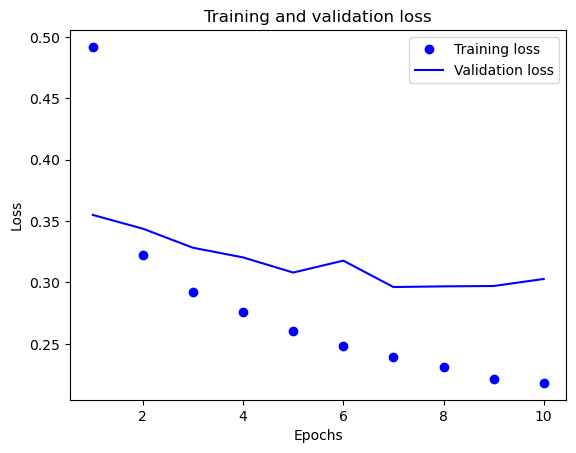

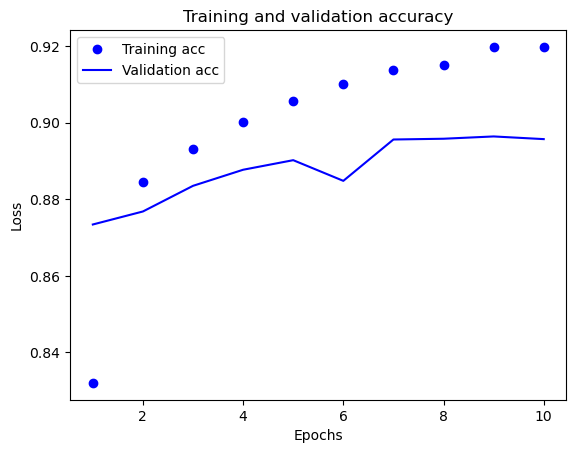

In [98]:
import matplotlib.pyplot as plt

history_visual(history1)

## Висновок №2
Побудована модель з використанням VGG16 показала непогані результати на навчальній вибірці: точність нейромережі становить приблизно 92%. На валідаційних даних  максимальна точність склала 90%. Ці результати схожі з тими, які було отримано у домашньому завданні №9, але гірші за отримані у першій частині завдання №10. Можливо потрібно було більше епох для якісного навчання моделі з використанням VGG16, але воно проходило досить довго, тому зупинемося на досягнутих результатах.